In [1]:
import matplotlib.pyplot as plt

from lib.fuzzy_classifier.protorypes import Circular, Elliptical, CMean, GustafsonKessel, GathGeva, Linear
from lib.fuzzy_classifier import FuzzyClustring

from data import datagen_2d


def scatter_2d_data(data):
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']
    plt.scatter(data[:, 0], data[:, 1], color=colors[1], lw=0)
    plt.xlim(0, 1000)
    plt.ylim(0, 1000)
    plt.show()


def cmean_test(clusters, noise=10):
    q = 100 * clusters
    xs = datagen_2d.generate_2d_cmeans_dataset(clusters, noise=noise, q=q)
    scatter_2d_data(xs)

    clusters = [CMean.CMeanCluster(1000, 2) for k in range(clusters)]
    fc = FuzzyClustring.FuzzyClassifier(xs, clusters, m=2)
    fc.fit(delta=.001, increase_iteration=20, increase_factor=1.2, plot_level=2, verbose_level=0, verbose_iteration=100)
    print fc.C
    fc.scatter_clusters_data()


def gustafsonkessel_test(clusters, noise=10):
    q = 100 * clusters
    xs = datagen_2d.generate_2d_gustafsonkessel_dataset(clusters, noise=noise, q=q)
    scatter_2d_data(xs)

    clusters = [GustafsonKessel.GKCluster(1000, 2) for k in range(clusters)]
    fc = FuzzyClustring.FuzzyClassifier(xs, clusters, m=2)
    fc.fit(delta=.001, increase_iteration=20, increase_factor=1.2, plot_level=2, verbose_level=0, verbose_iteration=100)
    print fc.C
    fc.scatter_clusters_data()


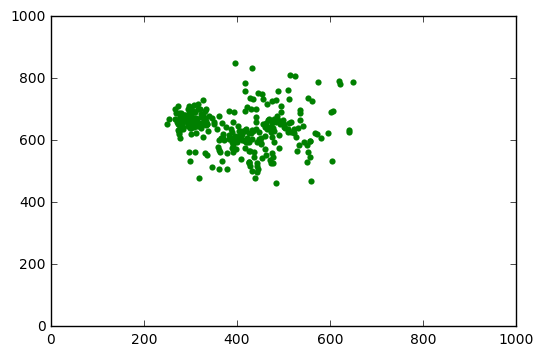

### 12
finish 0.000987637505791  <  0.001
distance sum:  19223434.8439


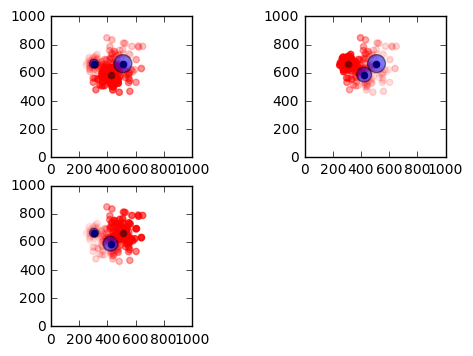

[CMeans cluster# v=[ 421.9889252   587.25070144] r=52.5562598386, CMeans cluster# v=[ 305.18204138  664.7862712 ] r=31.438514937, CMeans cluster# v=[ 509.46684858  665.05391979] r=63.6639969336]


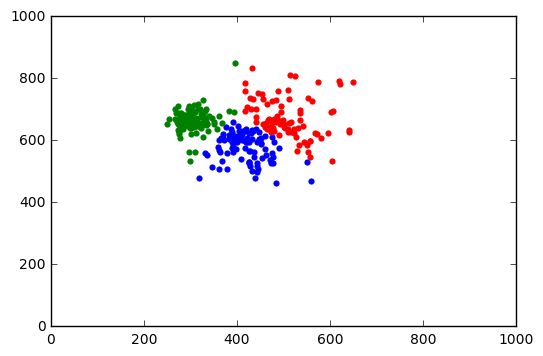

In [4]:
clusters = 3
noise = 10

q = 100 * clusters
xs = datagen_2d.generate_2d_cmeans_dataset(clusters, noise=noise, q=q)
scatter_2d_data(xs)

clusters = [CMean.CMeanCluster(1000, 2) for k in range(clusters)]
fc = FuzzyClustring.FuzzyClassifier(xs, clusters, m=2)
fc.fit(delta=.001, increase_iteration=20, increase_factor=1.2, plot_level=2, verbose_level=0, verbose_iteration=100)
print fc.C
fc.scatter_clusters_data()

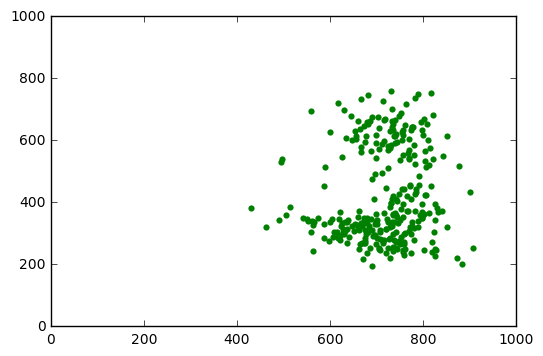

### 19
finish 0.000905112901665  <  0.001
distance sum:  60201084.2493


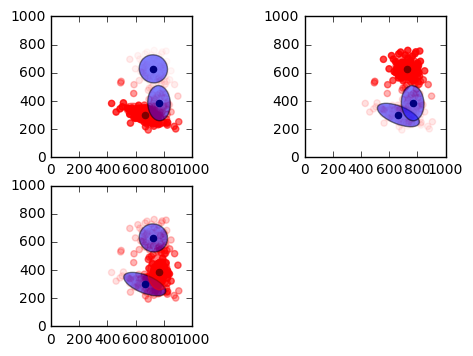

[GustafsonKessel cluster# v=[ 664.92148682  300.40655815] A=[[ 0.68942997  0.728777  ]
 [ 0.728777    2.22084328]], GustafsonKessel cluster# v=[ 725.96729019  628.06161425] A=[[ 0.99424536  0.0333193 ]
 [ 0.0333193   1.00690455]], GustafsonKessel cluster# v=[ 766.15122896  384.76657636] A=[[ 1.56092084  0.04937194]
 [ 0.04937194  0.64220911]]]


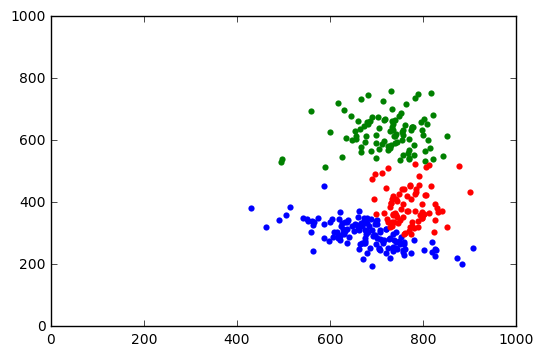

In [5]:
clusters = 3
noise = 10

q = 100 * clusters
xs = datagen_2d.generate_2d_gustafsonkessel_dataset(clusters, noise=noise, q=q)
scatter_2d_data(xs)

clusters = [GustafsonKessel.GKCluster(1000, 2) for k in range(clusters)]
fc = FuzzyClustring.FuzzyClassifier(xs, clusters, m=2)
fc.fit(delta=.001, increase_iteration=20, increase_factor=1.2, plot_level=2, verbose_level=0, verbose_iteration=100)
print fc.C
fc.scatter_clusters_data()

In [7]:
xs.shape

(300, 2)

In [9]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

reduced_data = PCA(n_components=2).fit_transform(data)


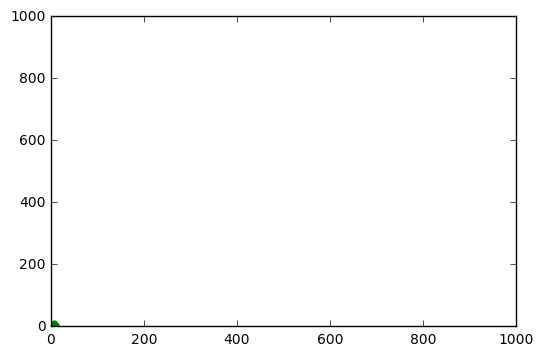

### 41
finish 0.00137186097536  <  0.00144
distance sum:  171209227.563


ValueError: num must be 1 <= num <= 15, not 0

In [10]:
clusters = 10
noise = 10

q = 100 * clusters
scatter_2d_data(reduced_data)

clusters = [CMean.CMeanCluster(1000, 2) for k in range(clusters)]
fc = FuzzyClustring.FuzzyClassifier(xs, clusters, m=2)
fc.fit(delta=.001, increase_iteration=20, increase_factor=1.2, plot_level=2, verbose_level=0, verbose_iteration=100)
print fc.C
fc.scatter_clusters_data()